

```
train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock.
```



In [0]:


import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [0]:
seed = 1973
np.random.seed(seed)

In [0]:
# load dataset
df = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [0]:
df.shape

(208, 61)

In [0]:
dataset = df.values
dataset


array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [0]:
dataset[:,0:60]

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [0]:
dataset[:,0:60].astype(float)

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [0]:
dataset[:,60]

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [0]:
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [0]:
X.shape

(208, 60)

In [0]:
Y.shape

(208,)

In [0]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=seed)

In [0]:
model = Sequential()
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                3660      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 5,521
Trainable params: 5,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
epochs = 500
batch_size = 5
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

69/69 [==============================] - 0s 479us/step
('Test loss:', 0.849136699800906)
('Test accuracy:', 0.7826086965160094)


In [0]:
predictions = model.predict(X_test)
#predictions

In [0]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
Y_pred

Y_pred  = Y_pred > 0.5  
Y_pred = Y_pred.astype(int) 
Y_pred

# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred) 
confusion_mtx

array([[33,  9],
       [ 6, 21]])

In [0]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observacion')
    plt.xlabel('Prediccion')

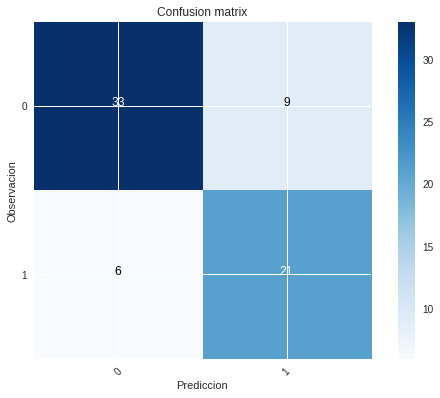

In [0]:
plot_confusion_matrix(confusion_mtx, classes = range(2))


In [0]:
from keras.layers import Conv1D, BatchNormalization, Dense, Dropout, Flatten, MaxPooling1D

model2 = Sequential()
model2.add(Conv1D(32, 4, input_shape=(60,1), activation='relu', name='conv1'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(30, activation='relu', name='fc1'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid', name='prediction'))

In [0]:
# Compile model
#model2.compile(loss='binary_crossentropy', 
#              optimizer='sgd', 
#              metrics=['accuracy'])

from keras.optimizers import Adam

lr = 1e-4
epochs = 500
model2.compile(Adam(lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 57, 32)            160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 57, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1824)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 30)                54750     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30)                120       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
__________

In [0]:
X_train

array([[0.034 , 0.0625, 0.0381, ..., 0.0051, 0.0033, 0.0058],
       [0.0094, 0.0166, 0.0398, ..., 0.0087, 0.0077, 0.0122],
       [0.0423, 0.0321, 0.0709, ..., 0.0021, 0.0043, 0.0017],
       ...,
       [0.0108, 0.0086, 0.0058, ..., 0.0023, 0.0026, 0.0027],
       [0.0283, 0.0599, 0.0656, ..., 0.0033, 0.0045, 0.0079],
       [0.0093, 0.0185, 0.0056, ..., 0.005 , 0.0058, 0.0025]])

In [0]:
trn_data = np.expand_dims(X_train, axis=2)
trn_data

array([[[0.034 ],
        [0.0625],
        [0.0381],
        ...,
        [0.0051],
        [0.0033],
        [0.0058]],

       [[0.0094],
        [0.0166],
        [0.0398],
        ...,
        [0.0087],
        [0.0077],
        [0.0122]],

       [[0.0423],
        [0.0321],
        [0.0709],
        ...,
        [0.0021],
        [0.0043],
        [0.0017]],

       ...,

       [[0.0108],
        [0.0086],
        [0.0058],
        ...,
        [0.0023],
        [0.0026],
        [0.0027]],

       [[0.0283],
        [0.0599],
        [0.0656],
        ...,
        [0.0033],
        [0.0045],
        [0.0079]],

       [[0.0093],
        [0.0185],
        [0.0056],
        ...,
        [0.005 ],
        [0.0058],
        [0.0025]]])

In [0]:
val_data = np.expand_dims(X_test, axis=2)
val_data

array([[[0.1021],
        [0.083 ],
        [0.0577],
        ...,
        [0.0214],
        [0.0227],
        [0.0106]],

       [[0.0331],
        [0.0423],
        [0.0474],
        ...,
        [0.0044],
        [0.0134],
        [0.0092]],

       [[0.0197],
        [0.0394],
        [0.0384],
        ...,
        [0.0045],
        [0.0047],
        [0.0054]],

       ...,

       [[0.0363],
        [0.0478],
        [0.0298],
        ...,
        [0.0114],
        [0.0073],
        [0.0033]],

       [[0.026 ],
        [0.0363],
        [0.0136],
        ...,
        [0.0036],
        [0.0061],
        [0.0115]],

       [[0.0109],
        [0.0093],
        [0.0121],
        ...,
        [0.0056],
        [0.0055],
        [0.0039]]])

In [0]:
epochs = 500
batch_size = 5
model2.fit(trn_data, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

In [0]:
test_loss, test_acc = model2.evaluate(val_data, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

69/69 [==============================] - 0s 1ms/step
('Test loss:', 0.3901233016580775)
('Test accuracy:', 0.8115942037623861)


In [0]:
Y_pred = model2.predict(val_data)
Y_pred

Y_pred  = Y_pred > 0.5  
Y_pred = Y_pred.astype(int) 
Y_pred

# Convert predictions classes to one hot vectors 
#Y_pred_classes = np.argmax(Y_pred) 
# Convert validation observations to one hot vectors
#Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred) 
confusion_mtx

array([[33,  9],
       [ 4, 23]])

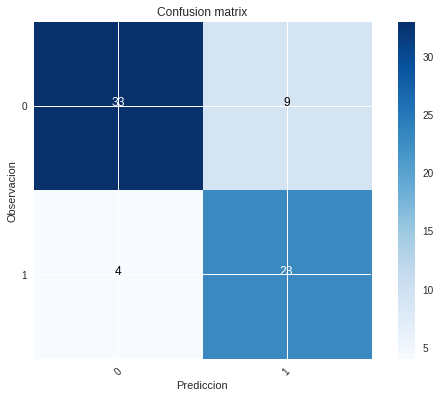

In [0]:
plot_confusion_matrix(confusion_mtx, classes = range(2))